In [28]:
import util
import vqe_class
import ansatz_circ

import numpy as np
import math
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mpl
from matplotlib import animation

from qiskit.primitives import Estimator,Sampler
from qiskit_aer import AerSimulator
from qiskit.algorithms.optimizers import COBYLA,NFT,GradientDescent,ADAM

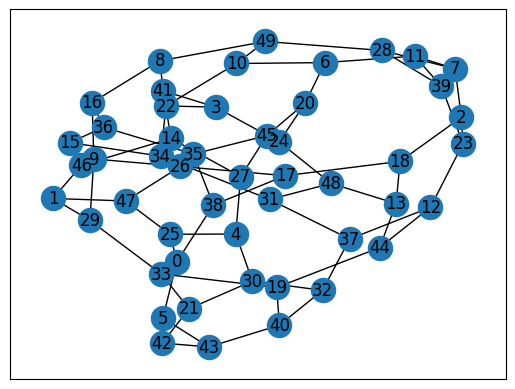

In [29]:
n_vertex=50
graph=nx.random_regular_graph(3,n_vertex)
p=0.6
#graph=nx.gnp_random_graph(n_vertex,p)
#graph=nx.barabasi_albert_graph(n_vertex,3)
sum=0
# Assign random weights to edges
for edge in graph.edges():
    a=np.random.rand(1)[0]
    sum+=a
    #graph.edges[edge]['weight'] = np.random.rand()
    graph.edges[edge]['weight'] = 1
nx.draw_networkx(graph)

In [30]:
max=util.branch_and_bound(graph)[0]
gw_cut=util.gw_cut(graph)

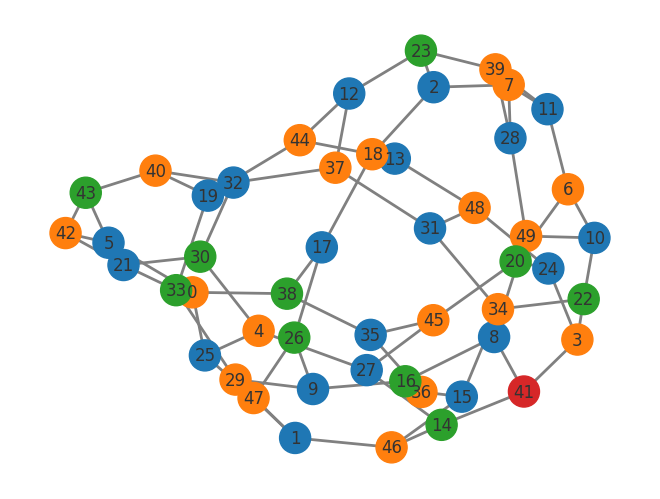

In [31]:
graph_coloring = nx.greedy_color(graph)

unique_colors = set(graph_coloring.values())

# Assign colors to nodes based on the greedy coloring
graph_color_to_mpl_color = dict(zip(unique_colors, mpl.TABLEAU_COLORS))
node_colors = [graph_color_to_mpl_color[graph_coloring[n]] for n in graph.nodes()]

pos = nx.spring_layout(graph, seed=14)
nx.draw(
    graph,
    pos,
    with_labels=True,
    node_size=500,
    node_color=node_colors,
    edge_color="grey",
    font_size=12,
    font_color="#333333",
    width=2,
)

In [32]:
nft=NFT(maxiter=1000, maxfev=1024, disp=False, reset_interval=1000, options=None)
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
adam=ADAM(maxiter=300, tol=1e-02, lr=0.1, beta_1=0.98, beta_2=0.99, noise_factor=1e-08, eps=1e-2, amsgrad=True, snapshot_dir=None)
g_d=GradientDescent(maxiter=300,learning_rate=0.01, tol=0.01, callback=None, perturbation=None)



estimator_dens= AerSimulator(method='density_matrix')
estimator_state= AerSimulator(method='statevector')
estimator = Estimator()
sampler = Sampler()


In [33]:
n_vertex=len(graph.nodes())
num_qubits=len(util.operator_vertex_qrao(graph)[0][0])
alpha=np.sqrt(len(graph.nodes()))

ans_ent=ansatz_circ.ansatz_efficient(num_qubits,5)
ans=ansatz_circ.sep_ansatz(graph,3)
circuits=ansatz_circ.multibasis_ansatz(ans)
circuits_ent=ansatz_circ.multibasis_ansatz(ans_ent)

9


In [34]:
stat=5
res_qrao_sep=[]
res_qrao_ent=[]
res_gw=[]
intermediate_qrao_sep = []
intermediate_qrao_ent = []
for i in range (stat):
    optimizer=cobyla
    gw_cut=util.gw_cut(graph)
    def callback(data):
        intermediate_qrao_sep.append(data)
    qrao=vqe_class.QRAO_encoding_VQE(estimator,sampler, circuits, optimizer,graph,min,shots=None,initial_parameters=None,callback=callback)
    result_qrao_sep= qrao.compute_minimum_eigenvalue(min)
    def callback(data):
        intermediate_qrao_ent.append(data)
    qrao=vqe_class.QRAO_encoding_VQE(estimator,sampler, circuits_ent, optimizer,graph,min,shots=None,initial_parameters=None,callback=callback)
    result_qrao_ent= qrao.compute_minimum_eigenvalue(min)
    res_qrao_sep.append(result_qrao_sep.eigenvalue/max)
    res_qrao_ent.append(result_qrao_ent.eigenvalue/max)
    res_gw.append(gw_cut/max)
    print(res_gw)
    print(res_qrao_sep)
    print(res_qrao_ent)

[ 0.52169172  0.9436845   0.57921683  1.32963718  1.45933664  1.44658662
 -0.35834133  1.58090385  1.48023281  0.17227742 -0.1452685  -0.19936076
  0.61441271  1.59838778 -0.19013147  0.78638845 -0.05367244  1.05948241
 -0.32665232  0.25358163  0.96474923  1.02622524  0.30088634  2.67334979
  1.32284033  1.16026004 -0.41114674  0.597256   -0.50184389  0.50775937
  1.69059516  0.03300087  0.08224582  1.66506494  1.07790064 -0.27772244
  0.72877044  0.50787239  1.00455494  0.13426287  1.36967893  0.37062854
  1.41199537  0.08301811  0.44409719  0.30350334 -0.09566588  0.56268228
  1.4713983  -0.87034357  1.59339564  1.13990866 -0.46972236  0.08678513]
[array([2.07820499]), array([0.10705876]), array([-2.427462]), array([1.77707574]), array([-0.62371701]), array([0.11236365]), array([0.66009785]), array([-0.70872804]), array([-0.96374938]), array([-0.43720091]), array([-1.09510595]), array([1.9878358]), array([0.76740917]), array([-0.02663354]), array([4.06891345]), array([1.05943849]), a

In [35]:
print(np.mean(np.array(res_qrao_sep)))
print(np.std(np.array(res_qrao_sep)))

0.8318840579710145
0.021690767459559095


In [36]:
print(np.mean(np.array(res_qrao_ent)))
print(np.std(np.array(res_qrao_ent)))

0.7246376811594203
0.024251015261857252


In [37]:
print(np.mean(np.array(res_gw)))
print(np.std(np.array(res_gw)))

0.9594202898550724
0.02810249192705122


In [38]:
843+1686+434+2316+464

5743